In [1]:
import numpy as np
import matplotlib.pyplot as plt

Round 1: gap=0.0000, refined on Q1
Round 2: gap=2.7424, refined on Q1
Round 3: gap=0.0000, refined on Q1
Round 4: gap=2.7424, refined on Q1
Round 5: gap=0.0000, refined on Q1
Round 6: gap=2.7424, refined on Q1


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36718 (\N{CJK UNIFIED IDEOGRAPH-8F6E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from current font.
  fig.canvas.print_figure(bytes_

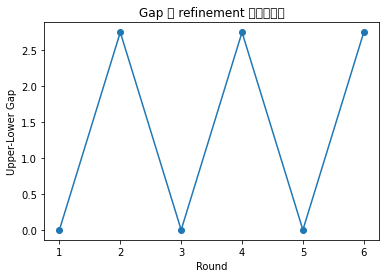

In [2]:
# 两个 scenario 的函数
def Q1(y):
    return y**2

def Q2(y):
    return (y-1)**2 + 1

y_vals = np.linspace(-1, 2, 200)

def pw_linear(y, approx_points):
    ys, vals = zip(*approx_points)
    return np.interp(y, ys, vals)

def compute_bounds(nodes):
    # piecewise approximation
    approx_points1 = [(y, Q1(y)) for y in nodes]
    approx_points2 = [(y, Q2(y)) for y in nodes]

    pw1 = [pw_linear(y, approx_points1) for y in y_vals]
    pw2 = [pw_linear(y, approx_points2) for y in y_vals]

    # lower bound = 最大的 piecewise underestimator
    lower = np.maximum(pw1, pw2)
    # upper bound = 最大的 true function
    upper = np.maximum(Q1(y_vals), Q2(y_vals))

    gap = np.max(upper - lower)
    return gap, lower, upper

def refine_once(nodes):
    # 找误差最大的 scenario
    approx_points1 = [(y, Q1(y)) for y in nodes]
    pw1 = [pw_linear(y, approx_points1) for y in y_vals]
    err1 = Q1(y_vals) - np.array(pw1)
    idx1 = np.argmax(np.abs(err1))

    approx_points2 = [(y, Q2(y)) for y in nodes]
    pw2 = [pw_linear(y, approx_points2) for y in y_vals]
    err2 = Q2(y_vals) - np.array(pw2)
    idx2 = np.argmax(np.abs(err2))

    if abs(err1[idx1]) >= abs(err2[idx2]):
        nodes.append(y_vals[idx1])
        chosen = "Q1"
    else:
        nodes.append(y_vals[idx2])
        chosen = "Q2"

    return nodes, chosen

# 初始化
nodes = [-1, 2]
gaps = []
rounds = 6

for r in range(rounds):
    gap, lower, upper = compute_bounds(nodes)
    gaps.append(gap)
    nodes, chosen = refine_once(nodes.copy())
    print(f"Round {r+1}: gap={gap:.4f}, refined on {chosen}")

# 画 gap 收敛情况
plt.plot(range(1, rounds+1), gaps, marker="o")
plt.xlabel("Round")
plt.ylabel("Upper-Lower Gap")
plt.title("Gap 随 refinement 轮次的变化")
plt.show()


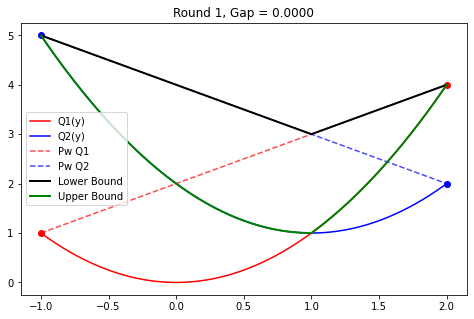

Round 1: gap=0.0000, refined on Q1 at y=0.496


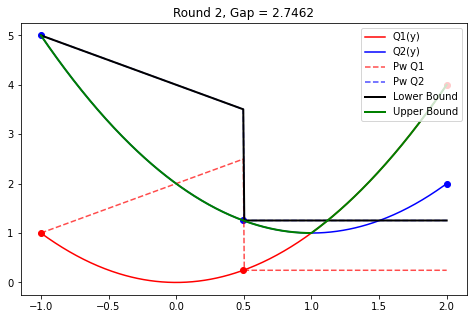

Round 2: gap=2.7462, refined on Q1 at y=2.000


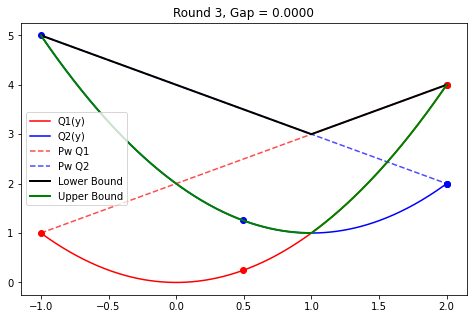

Round 3: gap=0.0000, refined on Q1 at y=0.496


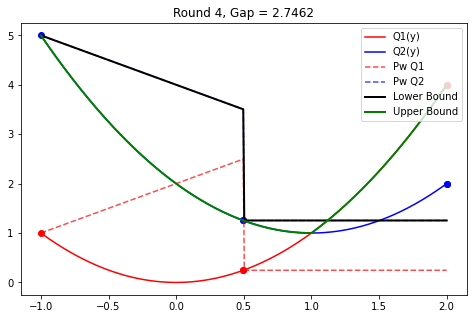

Round 4: gap=2.7462, refined on Q1 at y=2.000


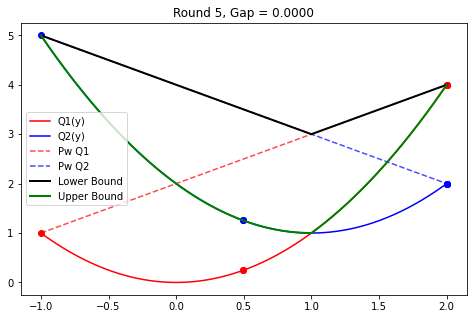

Round 5: gap=0.0000, refined on Q1 at y=0.496


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 两个 scenario 的函数
def Q1(y):
    return y**2

def Q2(y):
    return (y-1)**2 + 1

y_vals = np.linspace(-1, 2, 400)

def pw_linear(y, approx_points):
    ys, vals = zip(*approx_points)
    return np.interp(y, ys, vals)

def compute_bounds(nodes):
    approx_points1 = [(y, Q1(y)) for y in nodes]
    approx_points2 = [(y, Q2(y)) for y in nodes]

    pw1 = [pw_linear(y, approx_points1) for y in y_vals]
    pw2 = [pw_linear(y, approx_points2) for y in y_vals]

    lower = np.maximum(pw1, pw2)
    upper = np.maximum(Q1(y_vals), Q2(y_vals))
    gap = np.max(upper - lower)
    return gap, pw1, pw2, lower, upper

def refine_once(nodes):
    # Q1
    approx_points1 = [(y, Q1(y)) for y in nodes]
    pw1 = [pw_linear(y, approx_points1) for y in y_vals]
    err1 = Q1(y_vals) - np.array(pw1)
    idx1 = np.argmax(np.abs(err1))

    # Q2
    approx_points2 = [(y, Q2(y)) for y in nodes]
    pw2 = [pw_linear(y, approx_points2) for y in y_vals]
    err2 = Q2(y_vals) - np.array(pw2)
    idx2 = np.argmax(np.abs(err2))

    if abs(err1[idx1]) >= abs(err2[idx2]):
        nodes.append(y_vals[idx1])
        chosen = "Q1"
        y_star = y_vals[idx1]
    else:
        nodes.append(y_vals[idx2])
        chosen = "Q2"
        y_star = y_vals[idx2]

    return nodes, chosen, y_star

# 初始化
nodes = [-1, 2]
rounds = 5

for r in range(rounds):
    gap, pw1, pw2, lower, upper = compute_bounds(nodes)
    plt.figure(figsize=(8,5))
    plt.plot(y_vals, Q1(y_vals), "r-", label="Q1(y)")
    plt.plot(y_vals, Q2(y_vals), "b-", label="Q2(y)")
    plt.plot(y_vals, pw1, "r--", alpha=0.7, label="Pw Q1")
    plt.plot(y_vals, pw2, "b--", alpha=0.7, label="Pw Q2")
    plt.plot(y_vals, lower, "k-", linewidth=2, label="Lower Bound")
    plt.plot(y_vals, upper, "g-", linewidth=2, label="Upper Bound")
    plt.scatter(nodes, [Q1(n) for n in nodes], color="red")
    plt.scatter(nodes, [Q2(n) for n in nodes], color="blue")
    plt.title(f"Round {r+1}, Gap = {gap:.4f}")
    plt.legend()
    plt.show()

    nodes, chosen, y_star = refine_once(nodes.copy())
    print(f"Round {r+1}: gap={gap:.4f}, refined on {chosen} at y={y_star:.3f}")


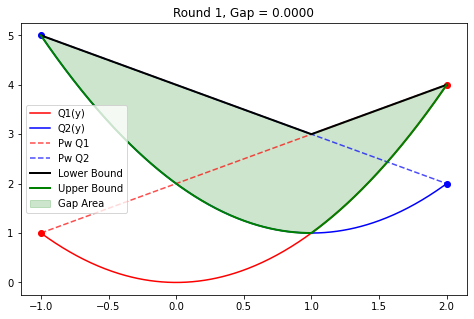

Round 1: gap=0.0000, refined on Q1 at y=0.496


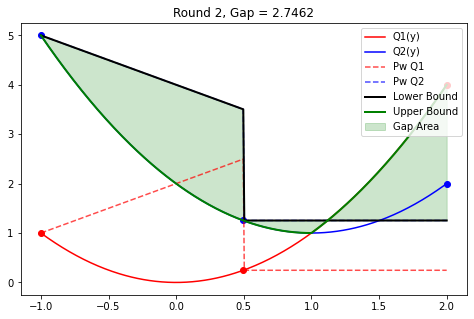

Round 2: gap=2.7462, refined on Q1 at y=2.000


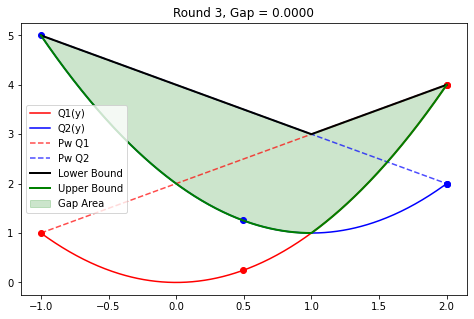

Round 3: gap=0.0000, refined on Q1 at y=0.496


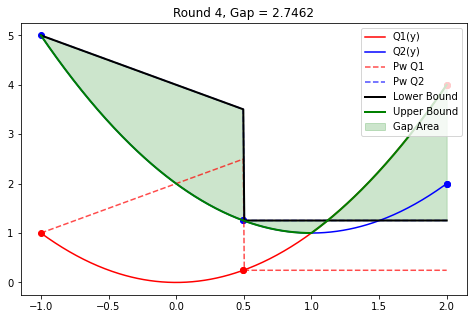

Round 4: gap=2.7462, refined on Q1 at y=2.000


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 两个 scenario 的函数
def Q1(y):
    return y**2

def Q2(y):
    return (y-1)**2 + 1

y_vals = np.linspace(-1, 2, 400)

def pw_linear(y, approx_points):
    ys, vals = zip(*approx_points)
    return np.interp(y, ys, vals)

def compute_bounds(nodes):
    approx_points1 = [(y, Q1(y)) for y in nodes]
    approx_points2 = [(y, Q2(y)) for y in nodes]

    pw1 = [pw_linear(y, approx_points1) for y in y_vals]
    pw2 = [pw_linear(y, approx_points2) for y in y_vals]

    lower = np.maximum(pw1, pw2)
    upper = np.maximum(Q1(y_vals), Q2(y_vals))
    gap = np.max(upper - lower)
    return gap, pw1, pw2, lower, upper

def refine_once(nodes):
    approx_points1 = [(y, Q1(y)) for y in nodes]
    pw1 = [pw_linear(y, approx_points1) for y in y_vals]
    err1 = Q1(y_vals) - np.array(pw1)
    idx1 = np.argmax(np.abs(err1))

    approx_points2 = [(y, Q2(y)) for y in nodes]
    pw2 = [pw_linear(y, approx_points2) for y in y_vals]
    err2 = Q2(y_vals) - np.array(pw2)
    idx2 = np.argmax(np.abs(err2))

    if abs(err1[idx1]) >= abs(err2[idx2]):
        nodes.append(y_vals[idx1])
        chosen = "Q1"
        y_star = y_vals[idx1]
    else:
        nodes.append(y_vals[idx2])
        chosen = "Q2"
        y_star = y_vals[idx2]

    return nodes, chosen, y_star

# 初始化
nodes = [-1, 2]
rounds = 4

for r in range(rounds):
    gap, pw1, pw2, lower, upper = compute_bounds(nodes)
    
    plt.figure(figsize=(8,5))
    plt.plot(y_vals, Q1(y_vals), "r-", label="Q1(y)")
    plt.plot(y_vals, Q2(y_vals), "b-", label="Q2(y)")
    plt.plot(y_vals, pw1, "r--", alpha=0.7, label="Pw Q1")
    plt.plot(y_vals, pw2, "b--", alpha=0.7, label="Pw Q2")
    plt.plot(y_vals, lower, "k-", linewidth=2, label="Lower Bound")
    plt.plot(y_vals, upper, "g-", linewidth=2, label="Upper Bound")

    # gap 阴影区域
    plt.fill_between(y_vals, lower, upper, color="green", alpha=0.2, label="Gap Area")

    plt.scatter(nodes, [Q1(n) for n in nodes], color="red")
    plt.scatter(nodes, [Q2(n) for n in nodes], color="blue")

    plt.title(f"Round {r+1}, Gap = {gap:.4f}")
    plt.legend()
    plt.show()

    nodes, chosen, y_star = refine_once(nodes.copy())
    print(f"Round {r+1}: gap={gap:.4f}, refined on {chosen} at y={y_star:.3f}")
